In [48]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

In [17]:
# load dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

Train: X = (60000, 28, 28), Y = (60000,)
Test: X = (10000, 28, 28), Y = (10000,)


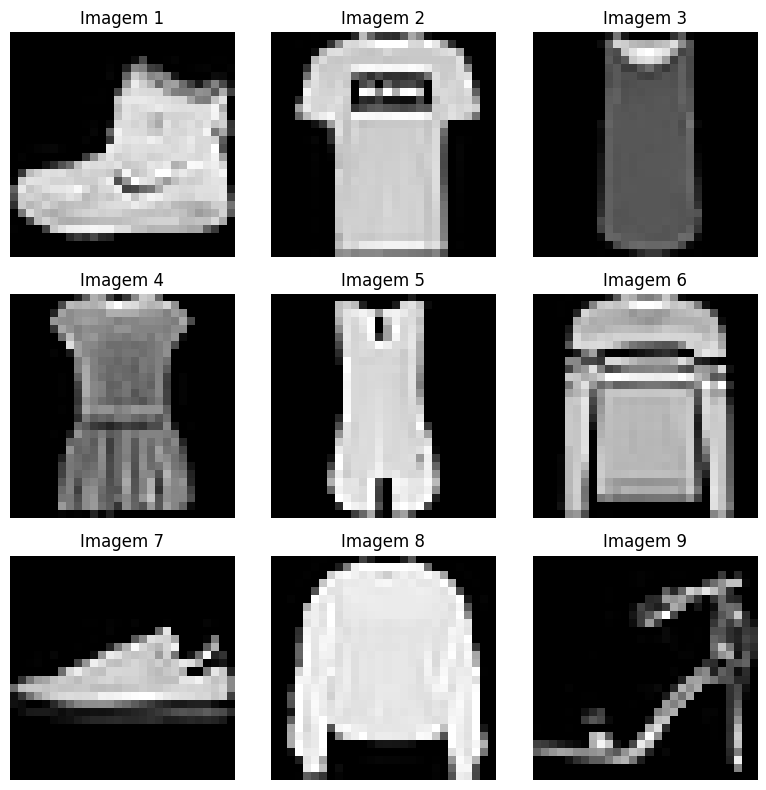

In [4]:
print("Train: X = %s, Y = %s" %(train_x.shape, train_y.shape))
print("Test: X = %s, Y = %s" %(test_x.shape, test_y.shape))

fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_x[i], cmap='gray')
    ax.set_title(f'Imagem {i+1}')  
    ax.axis('off')  

plt.tight_layout()

plt.show()

In [18]:
# reshape to have a single channel
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [19]:
train_y_one_hot = to_categorical(train_y, num_classes=10)
test_y_one_hot = to_categorical(test_y, num_classes=10)

In [7]:
print(train_y_one_hot.shape)

(60000, 10)


In [20]:
train_x = (train_x.astype('float32'))/255.
test_x = (test_x.astype('float32'))/255.

The CNN model function:

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD
from keras.metrics import Precision, Recall

In [21]:
model = Sequential()

# camada de convolucao e pooling
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# flattening
model.add(Flatten())
# camada densa
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# camada de saida
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
from sklearn.model_selection import KFold
kfold = KFold(5, shuffle=True, random_state=1)

In [24]:
import numpy as np

train_y_integers = np.argmax(train_y_one_hot, axis=1)

In [26]:
scores, hist = list(), list()
for train_ix, test_ix in kfold.split(train_x):
    trainX, trainY, testX, testY = train_x[train_ix], train_y_integers[train_ix], train_x[test_ix], train_y_integers[test_ix]
    hist1 = model.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> accuracy: %.3f' % (acc*100.0))
    scores.append(acc)
    hist.append(hist1)

> accuracy: 91.200
> accuracy: 97.083
> accuracy: 98.775
> accuracy: 99.158
> accuracy: 99.292


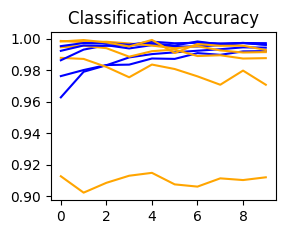

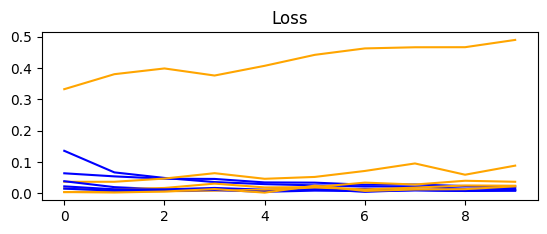

In [27]:
for i in range(len(hist)):
    plt.subplot(222)
    plt.title('Classification Accuracy')
    plt.plot(hist[i].history['accuracy'], color='blue', label='train')
    plt.plot(hist[i].history['val_accuracy'], color='orange', label='test')
plt.show()
for i in range(len(hist)):
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(hist[i].history['loss'], color='blue', label='train')
    plt.plot(hist[i].history['val_loss'], color='orange', label='test')
plt.show()

In [15]:
# hist = model.fit(train_x, train_y_integers, batch_size=32, epochs=10, validation_data=(test_x, test_y), verbose=1)

In [217]:
#test_y_integers = np.argmax(test_y_one_hot, axis=1)

#score = model.evaluate(test_x, test_y_integers, verbose=0)

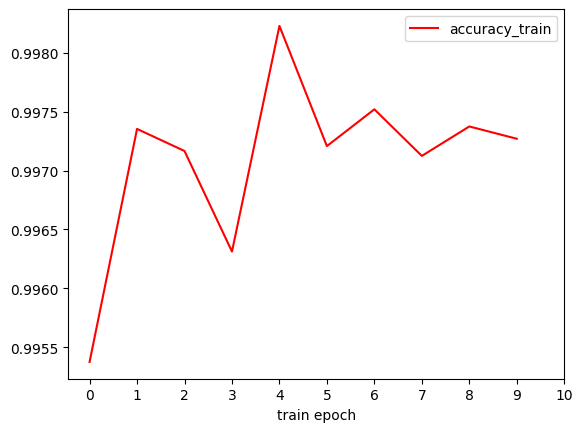

In [33]:
plt.plot(hist[4].epoch, hist[4].history['accuracy'], label='accuracy'+'_train', color='red')

plt.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('train epoch')
plt.show()

In [28]:
y_pred = model.predict(test_x)

predictions = [np.argmax(yi) for yi in y_pred]

313/313 [==============================] - 3s 9ms/step


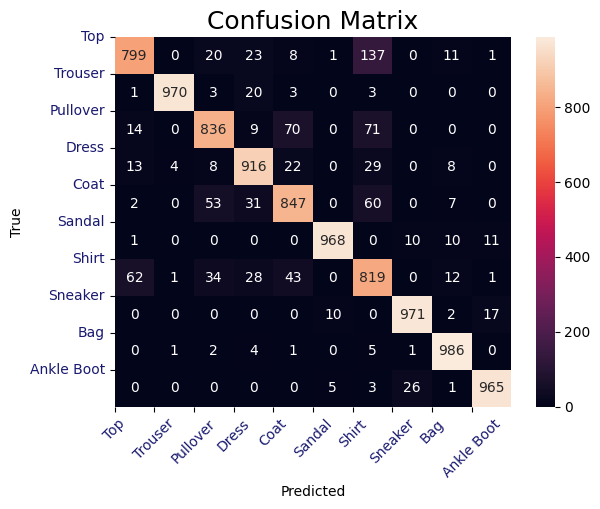

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
cm = confusion_matrix(test_y, predictions)
tick_positions = range(len(class_labels))

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=18)
plt.xticks(tick_positions, class_labels, rotation=45, color='midnightblue')
plt.xlabel('Predicted')
plt.yticks(tick_positions, class_labels, rotation=360, color='midnightblue')
plt.ylabel('True')
plt.show()

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [30]:
model.save('fashion_model.h5')

/home/samuel/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
